## VGGNet 16 Model using Oxfordflower17 Image Data

In [37]:
import numpy as np
import pandas  as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K
from keras.models import Sequential
from keras.layers import Rescaling, Dense, Conv2D, Activation, Dropout, MaxPooling2D, Flatten, RandomFlip, RandomRotation, RandomZoom, Dropout
from tensorflow.keras import layers

import pathlib
from time import time

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [4]:
img_height = 224
img_width = 224
batch_size = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    label_mode='categorical',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [8]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    label_mode='categorical',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [13]:
def plot_accuracy_loss(history, epochs):
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()
    plt.close('all')

In [9]:
# test model on new image
img_path = 'images/rose_test_img.jpeg'
img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(224, 224))
img_arr = tf.keras.utils.img_to_array(img)
img_arr = np.array([img_arr])

In [10]:
def get_new_image_predictions(model, img_arr):
    return model.predict(img_arr)

In [11]:
def plot_rose_predictions(img_prediction, class_names, model_name):
    min_pred = np.min(img_prediction[0])
    max_pred = np.max(img_prediction[0])
    scaled_pred = (img_prediction[0] - min_pred)/(max_pred - min_pred)

    fig, ax = plt.subplots()
    ax.bar(class_names, scaled_pred)
    ax.set_ylabel('Prediction')
    ax.set_title(f'Model Rose Prediction {model_name}')

    plt.show()
    plt.close('all')

# ------------ VGGNet16 Model ------------

In [7]:
# https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide
def build_vggnet_16():
    K.clear_session()
    
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(224, 224, 3)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(5, activation="softmax"))
    
    return model

In [14]:
model_vggnet16 = build_vggnet_16()

sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_vggnet16.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'VGGNet 16 Model took {end_time} seconds to compile')

VGGNet 16 Model took 0.004716634750366211 seconds to compile


In [38]:
model_vggnet16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [15]:
start_time = time()
history_vggnet16 = model_vggnet16.fit(train_ds, epochs=50, validation_data=val_ds, shuffle=True, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Model took {end_time} seconds to fit')

VGGNet 16 Model took 29143.931854963303 seconds to fit


In [16]:
start_time = time()
model_vggnet16_score = model_vggnet16.evaluate(val_ds, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Model took {end_time} seconds to score')

VGGNet 16 Model took 67.10387206077576 seconds to score


In [17]:
model_vggnet16_score_dict = dict(zip(model_vggnet16.metrics_names, model_vggnet16_score))
model_vggnet16_score_dict

{'loss': 5.004031658172607,
 'accuracy': 0.5295186042785645,
 'binary_accuracy': 0.8134423494338989,
 'categorical_accuracy': 0.5295186042785645,
 'categorical_crossentropy': 5.004031658172607}

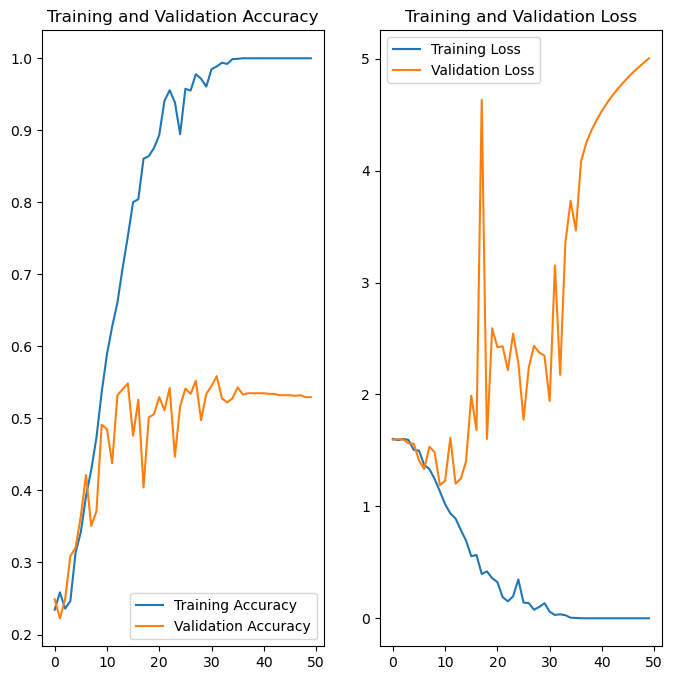

In [18]:
plot_accuracy_loss(history_vggnet16, 50)

1/1 [==============================] - 0s 205ms/step


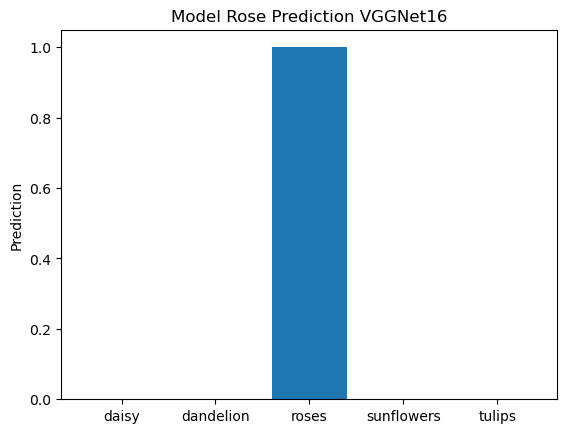

In [19]:
vggnet16_prediction = get_new_image_predictions(model_vggnet16, img_arr)
plot_rose_predictions(vggnet16_prediction, class_names, 'VGGNet16')

# ------------ VGGNet16 Model + Image Augmentation ------------

In [20]:
def build_vggnet_16_augmentation():
    K.clear_session()
    
    tf.random.set_seed(42)
    model = Sequential()
    # image augmentation
    model.add(RandomFlip("horizontal", input_shape=(224, 224, 3)))
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    
    model.add(Rescaling(1./255, input_shape=(224, 224, 3)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(5, activation="softmax"))
    
    return model

In [21]:
model_vggnet16_aug = build_vggnet_16_augmentation()

sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_vggnet16_aug.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'VGGNet 16 Aug. Model took {end_time} seconds to compile')

VGGNet 16 Aug. Model took 0.0032699108123779297 seconds to compile


In [22]:
start_time = time()
history_vggnet16_aug = model_vggnet16_aug.fit(train_ds, epochs=50, validation_data=val_ds, shuffle=True, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Aug. Model took {end_time} seconds to fit')

VGGNet 16 Aug. Model took 51934.24494624138 seconds to fit


In [23]:
start_time = time()
model_vggnet16_aug_score = model_vggnet16_aug.evaluate(val_ds, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Aug. Model took {end_time} seconds to score')

VGGNet 16 Aug. Model took 64.24692296981812 seconds to score


In [24]:
model_vggnet16_aug_score_dict = dict(zip(model_vggnet16_aug.metrics_names, model_vggnet16_aug_score))
model_vggnet16_aug_score_dict

{'loss': 0.9812443852424622,
 'accuracy': 0.7184377908706665,
 'binary_accuracy': 0.8910081386566162,
 'categorical_accuracy': 0.7184377908706665,
 'categorical_crossentropy': 0.9812443852424622}

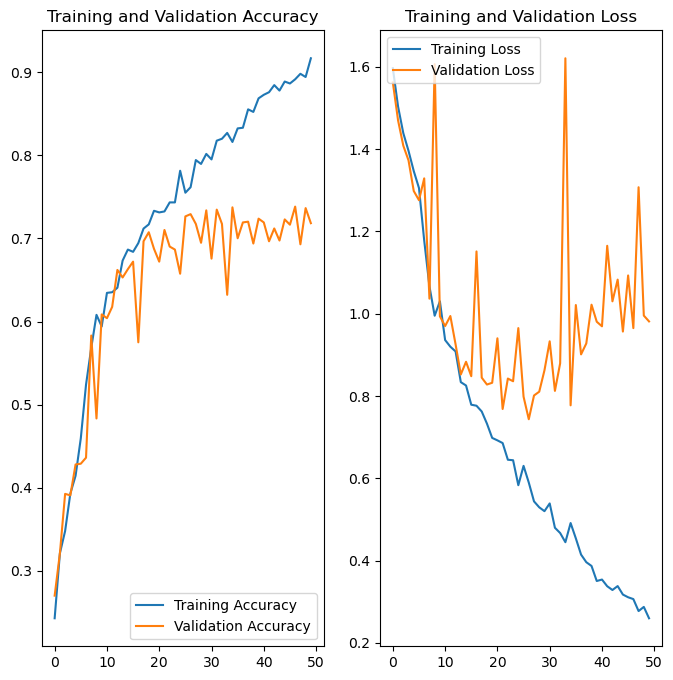

In [25]:
plot_accuracy_loss(history_vggnet16_aug, 50)

1/1 [==============================] - 0s 194ms/step


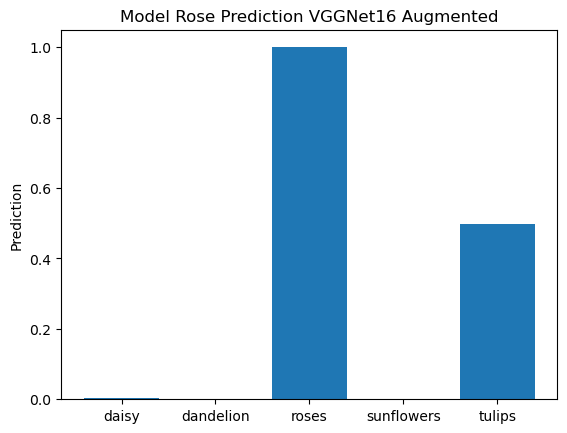

In [26]:
vggnet16_aug_prediction = get_new_image_predictions(model_vggnet16_aug, img_arr)
plot_rose_predictions(vggnet16_aug_prediction, class_names, 'VGGNet16 Augmented')

# ------------ VGGNet16 Model + Image Augmentation + Dropout ------------

In [27]:
def build_vggnet_16_augmentation_dropout():
    K.clear_session()
    
    tf.random.set_seed(42)
    model = Sequential()
    # image augmentation
    model.add(RandomFlip("horizontal", input_shape=(224, 224, 3)))
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    
    model.add(Rescaling(1./255, input_shape=(224, 224, 3)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(5, activation="softmax"))
    
    return model

In [28]:
model_vggnet16_aug_dropout = build_vggnet_16_augmentation_dropout()

sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

start_time = time()
model_vggnet16_aug_dropout.compile(loss='categorical_crossentropy', optimizer=sgd, 
                   metrics=['accuracy','binary_accuracy','categorical_accuracy','categorical_crossentropy'])
end_time = time() - start_time
print(f'VGGNet 16 Aug. Dropout Model took {end_time} seconds to compile')

VGGNet 16 Aug. Dropout Model took 0.002924203872680664 seconds to compile


In [29]:
start_time = time()
history_vggnet16_aug_dropout = model_vggnet16_aug_dropout.fit(train_ds, epochs=50, validation_data=val_ds, shuffle=True, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Aug. Dropout Model took {end_time} seconds to fit')

VGGNet 16 Aug. Dropout Model took 28308.581979990005 seconds to fit


In [30]:
start_time = time()
model_vggnet16_aug_dropout_score = model_vggnet16_aug_dropout.evaluate(val_ds, verbose=0)
end_time = time() - start_time
print(f'VGGNet 16 Aug. Dropout Model took {end_time} seconds to score')

VGGNet 16 Aug. Dropout Model took 64.68037796020508 seconds to score


In [31]:
model_vggnet16_aug_dropout_score_dict = dict(zip(model_vggnet16_aug_dropout.metrics_names, model_vggnet16_aug_dropout_score))
model_vggnet16_aug_dropout_score_dict

{'loss': 1.000471591949463,
 'accuracy': 0.7366030812263489,
 'binary_accuracy': 0.89627605676651,
 'categorical_accuracy': 0.7366030812263489,
 'categorical_crossentropy': 1.000471591949463}

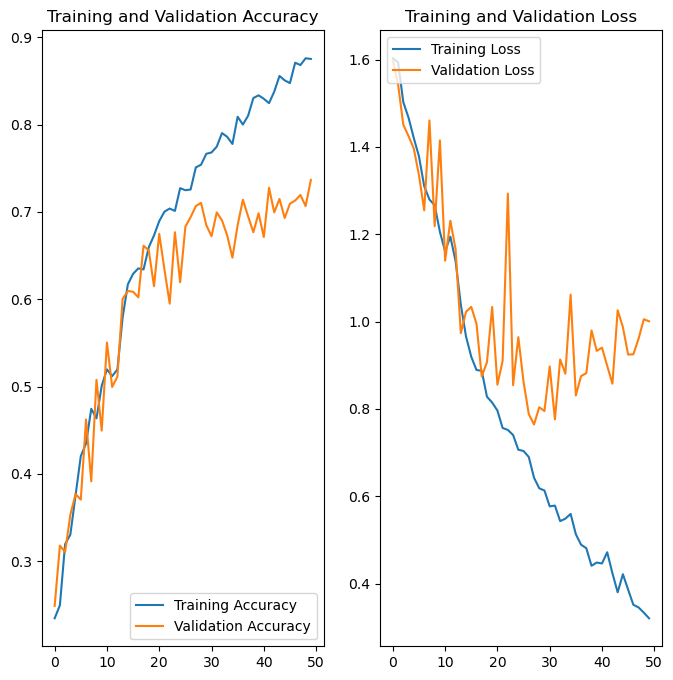

In [32]:
plot_accuracy_loss(history_vggnet16_aug_dropout, 50)

1/1 [==============================] - 0s 174ms/step


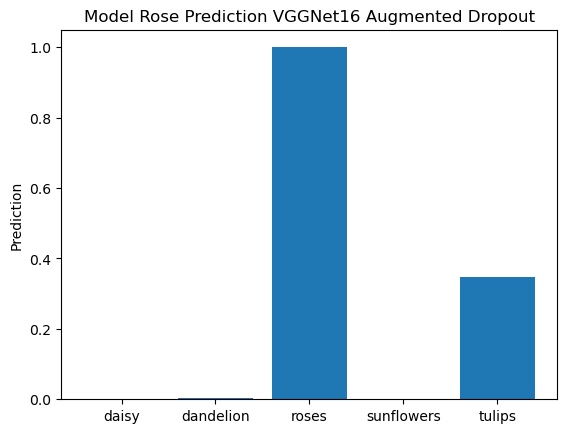

In [33]:
vggnet16_aug_dropout_prediction = get_new_image_predictions(model_vggnet16_aug_dropout, img_arr)
plot_rose_predictions(vggnet16_aug_dropout_prediction, class_names, 'VGGNet16 Augmented Dropout')

In [36]:
df_vggnet16 = pd.DataFrame([
    model_vggnet16_score_dict,
    model_vggnet16_aug_score_dict,
    model_vggnet16_aug_dropout_score_dict]
)
row_names = {
    0:'VGGNet16',
    1:'VGGNet16 Augmented',
    2:'VGGNet16 Augmented Dropout'
}
df_vggnet16.rename(index=row_names, inplace=True)
df_vggnet16

,loss,accuracy,binary_accuracy,categorical_accuracy,categorical_crossentropy
VGGNet16,5.004032,0.529519,0.813442,0.529519,5.004032
VGGNet16 Augmented,0.981244,0.718438,0.891008,0.718438,0.981244
VGGNet16 Augmented Dropout,1.000472,0.736603,0.896276,0.736603,1.000472
